In [1]:
# SupplySure - Supplier Reliability Dataset Generator

# --------------------------------------------
# 📦 Step 1: Import Required Libraries
# --------------------------------------------
import pandas as pd
import numpy as np
import random
import os

# --------------------------------------------
# 📦 Step 2: Set Seed for Reproducibility
# --------------------------------------------
random.seed(5)
np.random.seed(5)

# --------------------------------------------
# 📦 Step 3: Create Folder Structure if Missing
# --------------------------------------------
# Go one level up from notebooks/ and create data/ if it doesn't exist
os.makedirs("../data", exist_ok=True)

# --------------------------------------------
# 📦 Step 4: Generate Supplier Dataset
# --------------------------------------------

# Setup basic parameters
num_suppliers = 50
regions = ['Asia', 'Europe', 'North America', 'South America', 'Africa']
contract_types = ['Short-term', 'Long-term']

# Create empty list to hold supplier data
data = []

# Generate synthetic data
for i in range(num_suppliers):
    supplier_id = f"SUP{i+1:03d}"
    region = random.choice(regions)
    contract_type = random.choice(contract_types)
    avg_on_time_rate = round(np.clip(np.random.normal(0.85, 0.1), 0, 1), 2)
    avg_delay_days = round(np.clip(np.random.normal(2, 2), 0, 15), 1)
    order_accuracy_pct = int(np.clip(np.random.normal(95, 5), 70, 100))
    complaint_count = np.random.poisson(2)
    is_certified = random.choice([True, False])
    has_recent_disruption = random.choice([True, False])

    # Scoring logic for reliability
    score = (
        avg_on_time_rate * 2 +
        (100 - order_accuracy_pct) * -0.05 +
        complaint_count * -0.4 +
        (0 if is_certified else -0.5) +
        (-1 if has_recent_disruption else 0)
    )
    is_reliable = 1 if score > 0.5 else 0

    # Append supplier data row
    data.append([
        supplier_id, region, contract_type,
        avg_on_time_rate, avg_delay_days,
        order_accuracy_pct, complaint_count,
        is_certified, has_recent_disruption,
        is_reliable
    ])

# --------------------------------------------
# 📦 Step 5: Create DataFrame
# --------------------------------------------

# Define column names
columns = [
    "supplier_id", "region", "contract_type",
    "avg_on_time_rate", "avg_delay_days",
    "order_accuracy_pct", "complaint_count",
    "is_certified", "has_recent_disruption",
    "is_reliable"
]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# --------------------------------------------
# 📦 Step 6: Save the Dataset to CSV
# --------------------------------------------


# Save CSV right next to the notebook for now
df.to_csv("supplier_performance.csv", index=False)


# --------------------------------------------
# 📦 Step 7: Preview the Data
# --------------------------------------------

print("First 5 rows of generated supplier data:")
print(df.head())



First 5 rows of generated supplier data:
  supplier_id         region contract_type  avg_on_time_rate  avg_delay_days  \
0      SUP001         Africa     Long-term              0.89             1.3   
1      SUP002  South America    Short-term              0.82             1.2   
2      SUP003           Asia     Long-term              0.68             0.6   
3      SUP004  South America    Short-term              1.00             0.4   
4      SUP005         Europe     Long-term              0.92             0.1   

   order_accuracy_pct  complaint_count  is_certified  has_recent_disruption  \
0                 100                2         False                   True   
1                 100                2          True                   True   
2                 100                2         False                   True   
3                  89                1          True                   True   
4                 100                5         False                   True   

   

In [2]:
# Shape of dataset
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

# Check data types
print("\nData types:\n")
print(df.dtypes)

# Check for missing values
print("\nMissing values:\n")
print(df.isnull().sum())


Dataset has 50 rows and 10 columns.

Data types:

supplier_id               object
region                    object
contract_type             object
avg_on_time_rate         float64
avg_delay_days           float64
order_accuracy_pct         int64
complaint_count            int64
is_certified                bool
has_recent_disruption       bool
is_reliable                int64
dtype: object

Missing values:

supplier_id              0
region                   0
contract_type            0
avg_on_time_rate         0
avg_delay_days           0
order_accuracy_pct       0
complaint_count          0
is_certified             0
has_recent_disruption    0
is_reliable              0
dtype: int64


In [3]:
# Summary statistics
df.describe()


,avg_on_time_rate,avg_delay_days,order_accuracy_pct,complaint_count,is_reliable
count,50.000000,50.000000,50.000000,50.000000,50.00000
mean,0.838000,2.188000,94.220000,2.320000,0.14000
std,0.093852,1.650558,4.523363,1.634326,0.35051
min,0.640000,0.000000,86.000000,0.000000,0.00000
25%,0.772500,1.025000,91.000000,1.000000,0.00000
50%,0.830000,1.900000,94.000000,2.000000,0.00000
75%,0.910000,3.375000,98.750000,3.000000,0.00000
max,1.000000,7.400000,100.000000,7.000000,1.00000


C:\Users\tanvi\AppData\Local\Temp\ipykernel_3768\2545839379.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="region", palette="pastel")


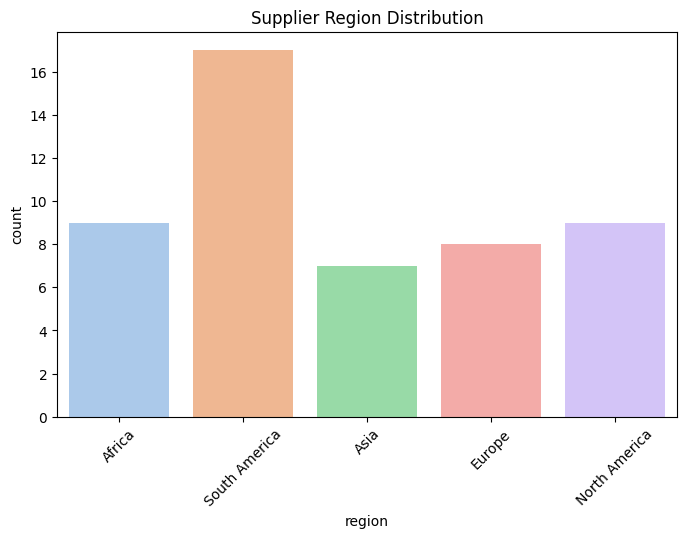

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot region distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="region", palette="pastel")
plt.title("Supplier Region Distribution")
plt.xticks(rotation=45)
plt.show()
